# Explore the Data

Background information:

The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants you to perform some exploratory data analysis.

The data that was sent over includes:

Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
Historical pricing data: variable and fixed pricing data etc
Churn indicator: whether each customer has churned or not

# Import Packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set plot style
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score


# Loading Datasets 

In [2]:
client_df = pd.read_csv("C:/Users/Priya/Desktop/pyhton & ML/customer churn/client_data.csv")
price_df  = pd.read_csv("C:/Users/Priya/Desktop/pyhton & ML/customer churn/price_data.xls")

In [3]:
client_df.head(5)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t      0.00   
1      2009-08-21   2015-08-31             189.95  ...        f      0.00   
2      2010-04-16   2015-04-17              47.96  ...        f      0.00   
3      2010-03-30   2015-03-31             240.04  ...        f      0.00   
4      2010-01-13   2015-03-09             445.75  ...        f     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0  

[5 rows x 26 columns]

In [4]:
price_df.head(5)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [5]:
price_df.head(5)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

# general information of datasets 

 client data 

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [8]:
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'])
client_df['date_end']   = pd.to_datetime(client_df['date_end'])
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'])
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'])

four features realated to date-time , converting them into datetime data type 

#    

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [10]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

one feature is related to date time convert them into datetime data type 

In [11]:
price_df['price_date']  = pd.to_datetime(price_df['price_date'])

## Unique values

In [12]:
def print_cardinality_categorical_features(df):
    print('String Features:')
    for feature in df.columns:
        if df[feature].dtype == 'object' and df[feature].nunique() >= 20:
            print(f"  {feature} : {df[feature].nunique()}")

    print('\nDiscrete Features:')
    for feature in df.columns:
        if df[feature].dtype != 'object' and df[feature].nunique() < 20:
            print(f"  {feature} : {df[feature].nunique()}")

    print('\nContinous Features:')
    for feature in df.columns:
        if df[feature].dtype != 'object' and df[feature].nunique() >= 20:
            print(f"  {feature} : {df[feature].nunique()}")
        
                  
                  
                
                
print(f"--------------------- No of Unique Values in Client_df ----------------\n")
print_cardinality_categorical_features(client_df)
print(f"\n--------------------- No of Unique Values in Price_df -----------------\n")
print_cardinality_categorical_features(price_df)

--------------------- No of Unique Values in Client_df ----------------

String Features:
  id : 14606

Discrete Features:
  forecast_discount_energy : 12
  nb_prod_act : 10
  num_years_antig : 13
  churn : 2

Continous Features:
  cons_12m : 11065
  cons_gas_12m : 2112
  cons_last_month : 4751
  date_activ : 1796
  date_end : 368
  date_modif_prod : 2129
  date_renewal : 386
  forecast_cons_12m : 13993
  forecast_cons_year : 4218
  forecast_meter_rent_12m : 3528
  forecast_price_energy_off_peak : 516
  forecast_price_energy_peak : 329
  forecast_price_pow_off_peak : 41
  imp_cons : 7752
  margin_gross_pow_ele : 2391
  margin_net_pow_ele : 2391
  net_margin : 11965
  pow_max : 698

--------------------- No of Unique Values in Price_df -----------------

String Features:
  id : 16096

Discrete Features:
  price_date : 12

Continous Features:
  price_off_peak_var : 1853
  price_peak_var : 1189
  price_mid_peak_var : 711
  price_off_peak_fix : 66
  price_peak_fix : 31
  price_mid_peak_fix

# Feature Engineering & EDA

In [13]:
client_df['contract_modification_interval'] = client_df.date_modif_prod.dt.year - client_df.date_activ.dt.year
client_df['contract_interval'] = client_df.date_end.dt.year - client_df.date_activ.dt.year

In [14]:
#Filtering out the January and December energy off peak price
price_off_peak_energy = price_df[['id','price_off_peak_var']]
jan_prices = price_off_peak_energy.groupby('id').price_off_peak_var.first().reset_index().rename(columns={'price_off_peak_var':'price_off_peak_var_jan'})
dec_prices = price_off_peak_energy.groupby('id').last().price_off_peak_var.reset_index().rename(columns={'price_off_peak_var':'price_off_peak_var_dec'})

In [15]:
price_df.drop('price_off_peak_var',axis=1,inplace=True)
#Taking average of Power off-peak and mid-peak
price_df = price_df.groupby('id').mean().reset_index()

C:\Users\Priya\AppData\Local\Temp\ipykernel_16984\3025141487.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_df = price_df.groupby('id').mean().reset_index()


In [16]:
#Calculating Energy off peak difference
price_df = price_df.merge(jan_prices,on='id').merge(dec_prices,on='id')
price_df['energy_off_peak_variation'] = price_df.price_off_peak_var_jan - price_df.price_off_peak_var_dec
price_df.drop(['price_off_peak_var_jan','price_off_peak_var_dec'],axis=1,inplace=True)

## merging client and price data

In [17]:
merged_df = client_df.merge(price_df, on='id')

merged_df.fillna(merged_df.groupby('id').transform('first'), inplace=True)

print(f"Unique Values in id feature of Client DataFrame : {client_df['id'].nunique()}")
print(f"Unique Values in id feature of Price DataFrame: {price_df['id'].nunique()}")
print(f"Unique Values in id feature of Merge DataFrame: {merged_df['id'].nunique()}\n\n")

print(f'Shape of Client DataFrame : {client_df.shape}')
print(f'Shape of Price DataFrame : {price_df.shape}')
print(f'Shape of Merge DataFrame : {merged_df.shape}')

Unique Values in id feature of Client DataFrame : 14606
Unique Values in id feature of Price DataFrame: 16096
Unique Values in id feature of Merge DataFrame: 14606


Shape of Client DataFrame : (14606, 28)
Shape of Price DataFrame : (16096, 7)
Shape of Merge DataFrame : (14606, 34)


#### There is no client data for 1490 clients.

### checking of duplicate and missing values

In [18]:
# define a function to display missing values and dupliate rows
def duplicate_and_missing(dataset, dataset_name):  
    print('There are', dataset.shape[0], 'rows and', dataset.shape[1], 'columns in the dataset', '"'+dataset_name+'"','\n'+'--'*40)
    # display missing values
    if dataset.isna().sum().sum()!=0:  # if there is missing values
        missing_value = dataset.isna().sum()[dataset.isna().sum()!=0].to_frame(name='count')
        missing_value['proportion'] = missing_value['count']/len(dataset)
        print('There are', dataset.isna().sum().sum(), 'missing values')
        print(missing_value, '\n'+'--'*40)
    else:
        print('There is no missing value')
    # display duplicate rows
    if dataset.duplicated().sum()!=0:
        print('There are', dataset.duplicated().sum(), 'duplicate rows\n')
    else:
        print('There is no duplicate row\n')
        
duplicate_and_missing(dataset=merged_df, dataset_name='merged_df')
duplicate_and_missing(dataset=client_df, dataset_name='client_df')
duplicate_and_missing(dataset=price_df, dataset_name='price_df')

There are 14606 rows and 34 columns in the dataset "merged_df" 
--------------------------------------------------------------------------------
There is no missing value
There is no duplicate row

There are 14606 rows and 28 columns in the dataset "client_df" 
--------------------------------------------------------------------------------
There is no missing value
There is no duplicate row

There are 16096 rows and 7 columns in the dataset "price_df" 
--------------------------------------------------------------------------------
There is no missing value
There is no duplicate row



### Identifying categorical variables 

In [19]:
def describe_categorical(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes == 'object'].index.tolist()
    
    if len(cat_columns) != 0:
        print('Categorical variables are', cat_columns, '\n' + '==' * 40)
        for cat in cat_columns:
            describe_frame = dataset[cat].value_counts().reset_index(name='count')
            describe_frame.columns = [cat, 'count']  # Rename the columns to match the categorical column name
            describe_frame['proportion'] = describe_frame['count'] / len(dataset)
            
            print(describe_frame)
            print('--' * 40)
    else:
        print('There are no categorical variables in the dataset')
        


# Print descriptions for client_df
print('## client_df ##')
print('\n' + '=' * 40)
describe_categorical(dataset=client_df)
print('\n' + '*' * 40)
print()

# Print descriptions for price_df
print('## Price_df ##')
print('\n' + '=' * 40)
describe_categorical(dataset=price_df)
print('\n' + '*' * 40)
print()

# Print descriptions for merged_df
print('## merged_df ##')
print('\n' + '=' * 40)
describe_categorical(dataset=merged_df)
print('\n' + '*' * 40)
print()


## client_df ##

Categorical variables are ['id', 'channel_sales', 'has_gas', 'origin_up'] 
                                     id  count  proportion
0      24011ae4ebbe3035111d65fa7c15bc57      1    0.000068
1      2fae70276cd7a4874a2aefcd68d5a184      1    0.000068
2      a7a9dac0ffc2ad56c66a1b08d53d0e51      1    0.000068
3      6cfbce2099a4163ea4fe422fb28829ea      1    0.000068
4      4289e929ecd35a0754e697feb24a091b      1    0.000068
...                                 ...    ...         ...
14601  0b69432a3ceee7763bf86ffe30c6bc2d      1    0.000068
14602  6cabca88c760284183f51f84e4a27b1e      1    0.000068
14603  de92494d7140dc94be6a1ebafaf98056      1    0.000068
14604  a8e828bfad0869527e9acdd39a36cc91      1    0.000068
14605  563dde550fd624d7352f3de77c0cdfcd      1    0.000068

[14606 rows x 3 columns]
--------------------------------------------------------------------------------
                      channel_sales  count  proportion
0  foosdfpfkusacimwkcsosbicdxkicaua   

In [20]:
# Dictionary to map original values to new values
channel_sales_mapping = {
    'foosdfpfkusacimwkcsosbicdxkicaua': 'A',
    'MISSING': 'B',
    'lmkebamcaaclubfxadlmueccxoimlema': 'C',
    'usilxuppasemubllopkaafesmlibmsdf': 'D',
    'ewpakwlliwisiwduibdlfmalxowmwpci': 'E',
    'sddiedcslfslkckwlfkdpoeeailfpeds': 'F',
    'epumfxlbckeskwekxbiuasklxalciiuu': 'G',
    'fixdbufsefwooaasfcxdxadsiekoceaa': 'H'  # Replace with the corresponding letter
}
origin_mask = {
    'lxidpiddsbxsbosboudacockeimpuepw' : 'origin_1',
    'kamkkxfxxuwbdslkwifmmcsiusiuosws' : 'origin_2',
    'ldkssxwpmemidmecebumciepifcamkci' : 'origin_3',
    'usapbepcfoloekilkwsdiboslwaxobdp' : 'origin_4',
    'ewxeelcelemmiwuafmddpobolfuxioce' : 'origin_5',
    'MISSING' : 'origin_missing'
}
has_mask = {
    'f': 1,
    't': 0
}
    

# Applying the mapping to the 'channel_sales' column
client_df['channel_sales'] = client_df['channel_sales'].map(channel_sales_mapping)
merged_df['channel_sales'] = merged_df['channel_sales'].map(channel_sales_mapping)

client_df['origin_up'] = client_df['origin_up'].map(origin_mask)
merged_df['origin_up'] = merged_df['origin_up'].map(origin_mask)

client_df['has_gas'] = client_df['has_gas'].map(has_mask)
merged_df['has_gas'] = merged_df['has_gas'].map(has_mask)

merged_df

id channel_sales  cons_12m  cons_gas_12m  \
0      24011ae4ebbe3035111d65fa7c15bc57             A         0         54946   
1      d29c2c54acc38ff3c0614d0a653813dd             B      4660             0   
2      764c75f661154dac3a6c254cd082ea7d             A       544             0   
3      bba03439a292a1e166f80264c16191cb             C      1584             0   
4      149d57cf92fc41cf94415803a877cb4b             B      4425             0   
...                                 ...           ...       ...           ...   
14601  18463073fb097fc0ac5d3e040f356987             A     32270         47940   
14602  d0a6f71671571ed83b2645d23af6de00             A      7223             0   
14603  10e6828ddd62cbcf687cb74928c4c2d2             A      1844             0   
14604  1cf20fd6206d7678d5bcafd28c53b4db             A       131             0   
14605  563dde550fd624d7352f3de77c0cdfcd             B      8730             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
0                    0 2013-06-15 2016-06-15      2015-11-01   2015-06-23   
1                    0 2009-08-21 2016-08-30      2009-08-21   2015-08-31   
2                    0 2010-04-16 2016-04-16      2010-04-16   2015-04-17   
3                    0 2010-03-30 2016-03-30      2010-03-30   2015-03-31   
4                  526 2010-01-13 2016-03-07      2010-01-13   2015-03-09   
...                ...        ...        ...             ...          ...   
14601                0 2012-05-24 2016-05-08      2015-05-08   2014-05-26   
14602              181 2012-08-27 2016-08-27      2012-08-27   2015-08-28   
14603              179 2012-02-08 2016-02-07      2012-02-08   2015-02-09   
14604                0 2012-08-30 2016-08-30      2012-08-30   2015-08-31   
14605                0 2009-12-18 2016-12-17      2009-12-18   2015-12-21   

       forecast_cons_12m  ...  pow_max  churn  contract_modification_interval  \
0                   0.00  ...   43.648      1                               2   
1                 189.95  ...   13.800      0                               0   
2                  47.96  ...   13.856      0                               0   
3                 240.04  ...   13.200      0                               0   
4                 445.75  ...   19.800      0                               0   
...                  ...  ...      ...    ...                             ...   
14601            4648.01  ...   15.000      0                               3   
14602             631.69  ...    6.000      1                               0   
14603             190.39  ...   15.935      1                               0   
14604              19.34  ...   11.000      0                               0   
14605             762.41  ...   10.392      0                               0   

       contract_interval  price_peak_var  price_mid_peak_var  \
0                      3        0.100749            0.066530   
1                      7        0.007124            0.000000   
2                      6        0.088421            0.000000   
3                      6        0.000000            0.000000   
4                      6        0.103638            0.072865   
...                  ...             ...                 ...   
14601                  4        0.000000            0.000000   
14602                  4        0.095406            0.070817   
14603                  4        0.103794            0.073160   
14604                  4        0.007124            0.000000   
14605                  7        0.087344            0.000000   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  \
0               40.942265       22.352010           14.901340   
1               44.311375        0.000000            0.000000   
2               44.385450        0.000000            0.000000   
3               44.400265        0.000000            0.000000   
4               40.688156       24.412893           16.275263   
...    

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [22]:
merged_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  ...       pow_max         churn  \
count                 14606.000000  ...  14606.000000  14606.000000   
mean                     43.130056  ...     18.135136      0.097152   
std                       4.485988  ...     13.534743      0.296175   
min                       0.000000  ...      3.300000      0.000000   
25%                      40.606701  ...     12.500000      0.000000   
50%                      44.311378  ...     13.856000      0.000000   
75%                      44.311378  ...     19.172500      0.000000   
max                      59.266378  ...    320.000000      1.000000   

       contract_modification_interval  contract_interval  price_peak_var  \
count                    14606.000000       14606.000000    14606.000000   
mean                         1.890251           5.487060        0.052063   
std                          2.298371           1.659825        0.049879   
min                          0.000000           2.000000        0.000000   
25%                          0.000000           4.000000        0.000000   
50%                          0.000000           5.000000        0.084509   
75%                          4.000000           6.000000        0.102479   
max                         12.000000          13.000000        0.196275   

       price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
count        14606.000000        14606.000000    14606.000000   
mean             0.028276           42.928890        9.460874   
std              0.035802            4.550759       12.053587   
min              0.000000            0.000000        0.000000   
25%              0.000000           40.688156        0.000000   
50%              0.000000           44.281745        0.000000   
75%              0.072833           44.370635       24.372163   
max              0.102951           59.286190       36.490689   

       price_mid_peak_fix  energy_off_peak_variation  
count        14606.000000               1460

### Identifying Numerical variables 

In [23]:
def describe_numeric(dataset):
    int_columns = [col for col in dataset.columns if dataset[col].dtype == 'int']
    float_columns = [col for col in dataset.columns if dataset[col].dtype == 'float']
    
    if int_columns or float_columns:
        numeric_columns = int_columns + float_columns
        print(f"Numeric variables are: {numeric_columns}\n{'==' * 40}")
        
        for num_col in numeric_columns:
            value_counts = dataset[num_col].value_counts()
            total_count = len(dataset)
            describe_frame = pd.DataFrame({
                'Count': value_counts.values,
                'Proportion': value_counts / total_count
            }, index=value_counts.index)
            describe_frame.index.name = 'Value'
            print(f"Description for '{num_col}':")
            print(describe_frame)
            print('--' * 40)
    else:
        print('There are no numeric variables in the dataset')

# Call the function with your dataset
print('## client_df ##')
print("                ")
describe_numeric(dataset=client_df)
print('','*****'*16)
print('           ')

print('## Price_df ##')
print("                ")
describe_numeric(dataset=price_df)
print('','*****'*16)
print('           ')

print('## merged_df ##')
print("                ")
describe_numeric(dataset=merged_df)


## client_df ##
                
Numeric variables are: ['forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']
Description for 'forecast_cons_12m':
         Count  Proportion
Value                     
0.00       306    0.020950
0.15         6    0.000411
415.14       4    0.000274
0.45         3    0.000205
1539.37      3    0.000205
...        ...         ...
5476.57      1    0.000068
11.50        1    0.000068
775.54       1    0.000068
837.56       1    0.000068
762.41       1    0.000068

[13993 rows x 2 columns]
--------------------------------------------------------------------------------
Description for 'forecast_discount_energy':
       Count  Proportion
Value                   
0.0    14094    0.964946
30.0     260    0.017801
28.0     102    0.006983
24.0      83    0.005683


### Checking datetime features

In [24]:
def describe_datetime_columns(dataset):
    datetime_columns = dataset.select_dtypes(include=['datetime64[ns]']).columns
    
    if len(datetime_columns) > 0:
        print(f"Datetime columns are: {', '.join(datetime_columns)}\n{'==' * 40}")
        
        for dt_col in datetime_columns:
            description = dataset[dt_col].describe(datetime_is_numeric=True)
            print(f"Description for '{dt_col}':")
            print(description)
            print('--' * 40)
    else:
        print('There are no datetime columns in the dataset')

# Call the function with your dataset
describe_datetime_columns(dataset=merged_df)

Datetime columns are: date_activ, date_end, date_modif_prod, date_renewal
Description for 'date_activ':
count                            14606
mean     2011-01-28 07:54:18.879912448
min                2003-05-09 00:00:00
25%                2010-01-15 00:00:00
50%                2011-03-04 00:00:00
75%                2012-04-19 00:00:00
max                2014-09-01 00:00:00
Name: date_activ, dtype: object
--------------------------------------------------------------------------------
Description for 'date_end':
count                            14606
mean     2016-07-27 20:48:26.422018560
min                2016-01-28 00:00:00
25%                2016-04-27 06:00:00
50%                2016-08-01 00:00:00
75%                2016-10-31 00:00:00
max                2017-06-13 00:00:00
Name: date_end, dtype: object
--------------------------------------------------------------------------------
Description for 'date_modif_prod':
count                            14606
mean     2013-01-02 12:2

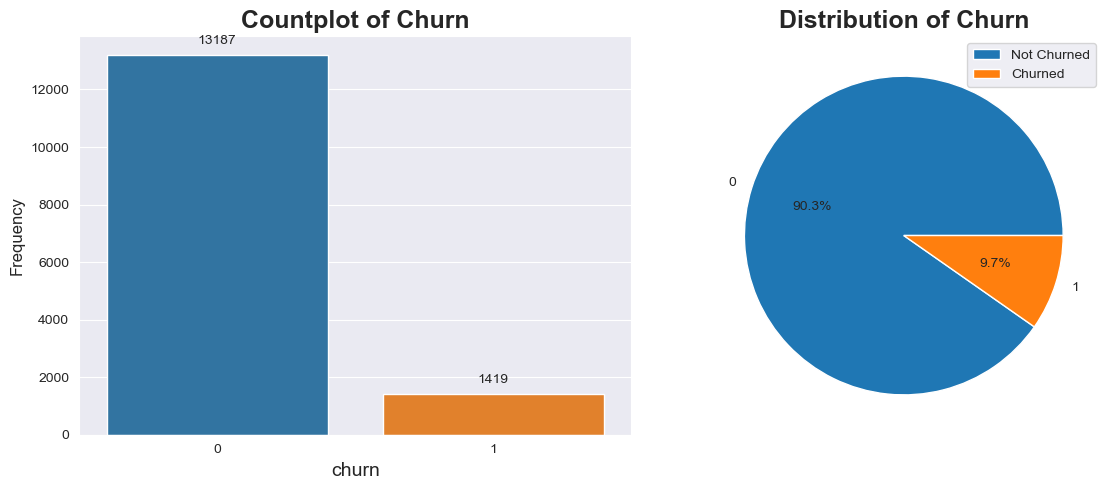

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Countplot
sns.countplot(data=merged_df, 
              x='churn', 
              ax=axs[0])

axs[0].set_xlabel('churn', fontsize=14)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].set_title('Countplot of Churn', fontsize=18, fontweight='bold')

# Annotation for countplot
for p in axs[0].patches:
    axs[0].annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., 
                     p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

# Pie Chart
axs[1].set_title('Distribution of Churn', fontsize=18, fontweight='bold')
axs[1].pie(merged_df['churn'].value_counts(), 
           labels=merged_df['churn'].value_counts().index, 
           autopct='%1.1f%%')

legend_labels = ['Not Churned', 'Churned']
axs[1].legend(legend_labels, loc = 'best')


fig.tight_layout()
plt.show()

The analysis of the plot reveals that about 90.3% of the data points belong to the "Not churn" category. This emphasizes a large majority of non-churning customers. Recognizing this distribution is essential for insights. The significant "Not churn" prevalence signals dataset imbalance, requiring techniques like oversampling or ensembling to improve model predictions and handle class imbalance.

### Histogram and Boxplot of Continous Features

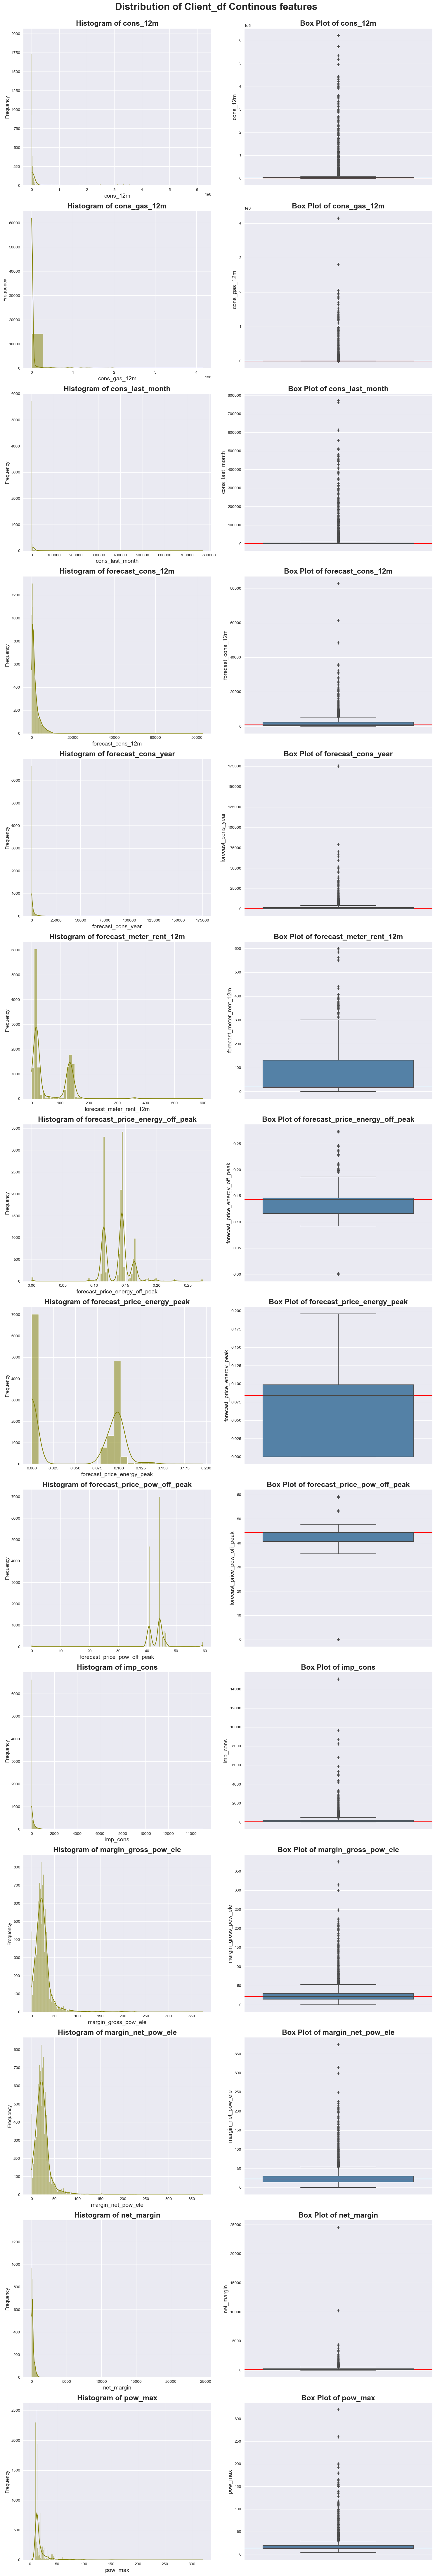

In [26]:
def plot_continous_features(df, cont_features, df_name, figsize=(15, 90)):
    n_rows = len(cont_features)
    n_cols = 2
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
    axs = axs.flatten()


    for i, feature in enumerate(cont_features):
        sns.histplot(data=df, kde= True, x=feature, color="olive", ax=axs[2*i])
        axs[2*i].set_xlabel(feature, fontsize=14)
        axs[2*i].set_ylabel("Frequency", fontsize=12)
        axs[2*i].set_title("Histogram of " + feature, fontsize=18,  weight='bold') 
        
        # Plot the box plot on the right side
        sns.boxplot(data=df, y=feature,color= 'steelblue', ax=axs[2*i+1])
        axs[2*i+1].set_ylabel(feature, fontsize=14)
        axs[2*i+1].axhline(df[feature].median(), color="red")
        axs[2*i+1].set_title("Box Plot of " + feature, fontsize=18,  weight='bold')



    fig.suptitle(f"Distribution of {df_name} Continous features \n\n\n\n\n", fontsize=24, weight='bold')
    fig.tight_layout()
    plt.show()
    
    
    
num_features = list(client_df.columns[(client_df.dtypes != 'object') & (client_df.dtypes != 'datetime64[ns]') & (client_df.nunique() > 20)])
plot_continous_features(client_df, 
                        num_features, 
                        df_name = 'Client_df')

* Data is skewed and should be taken care before modelling 

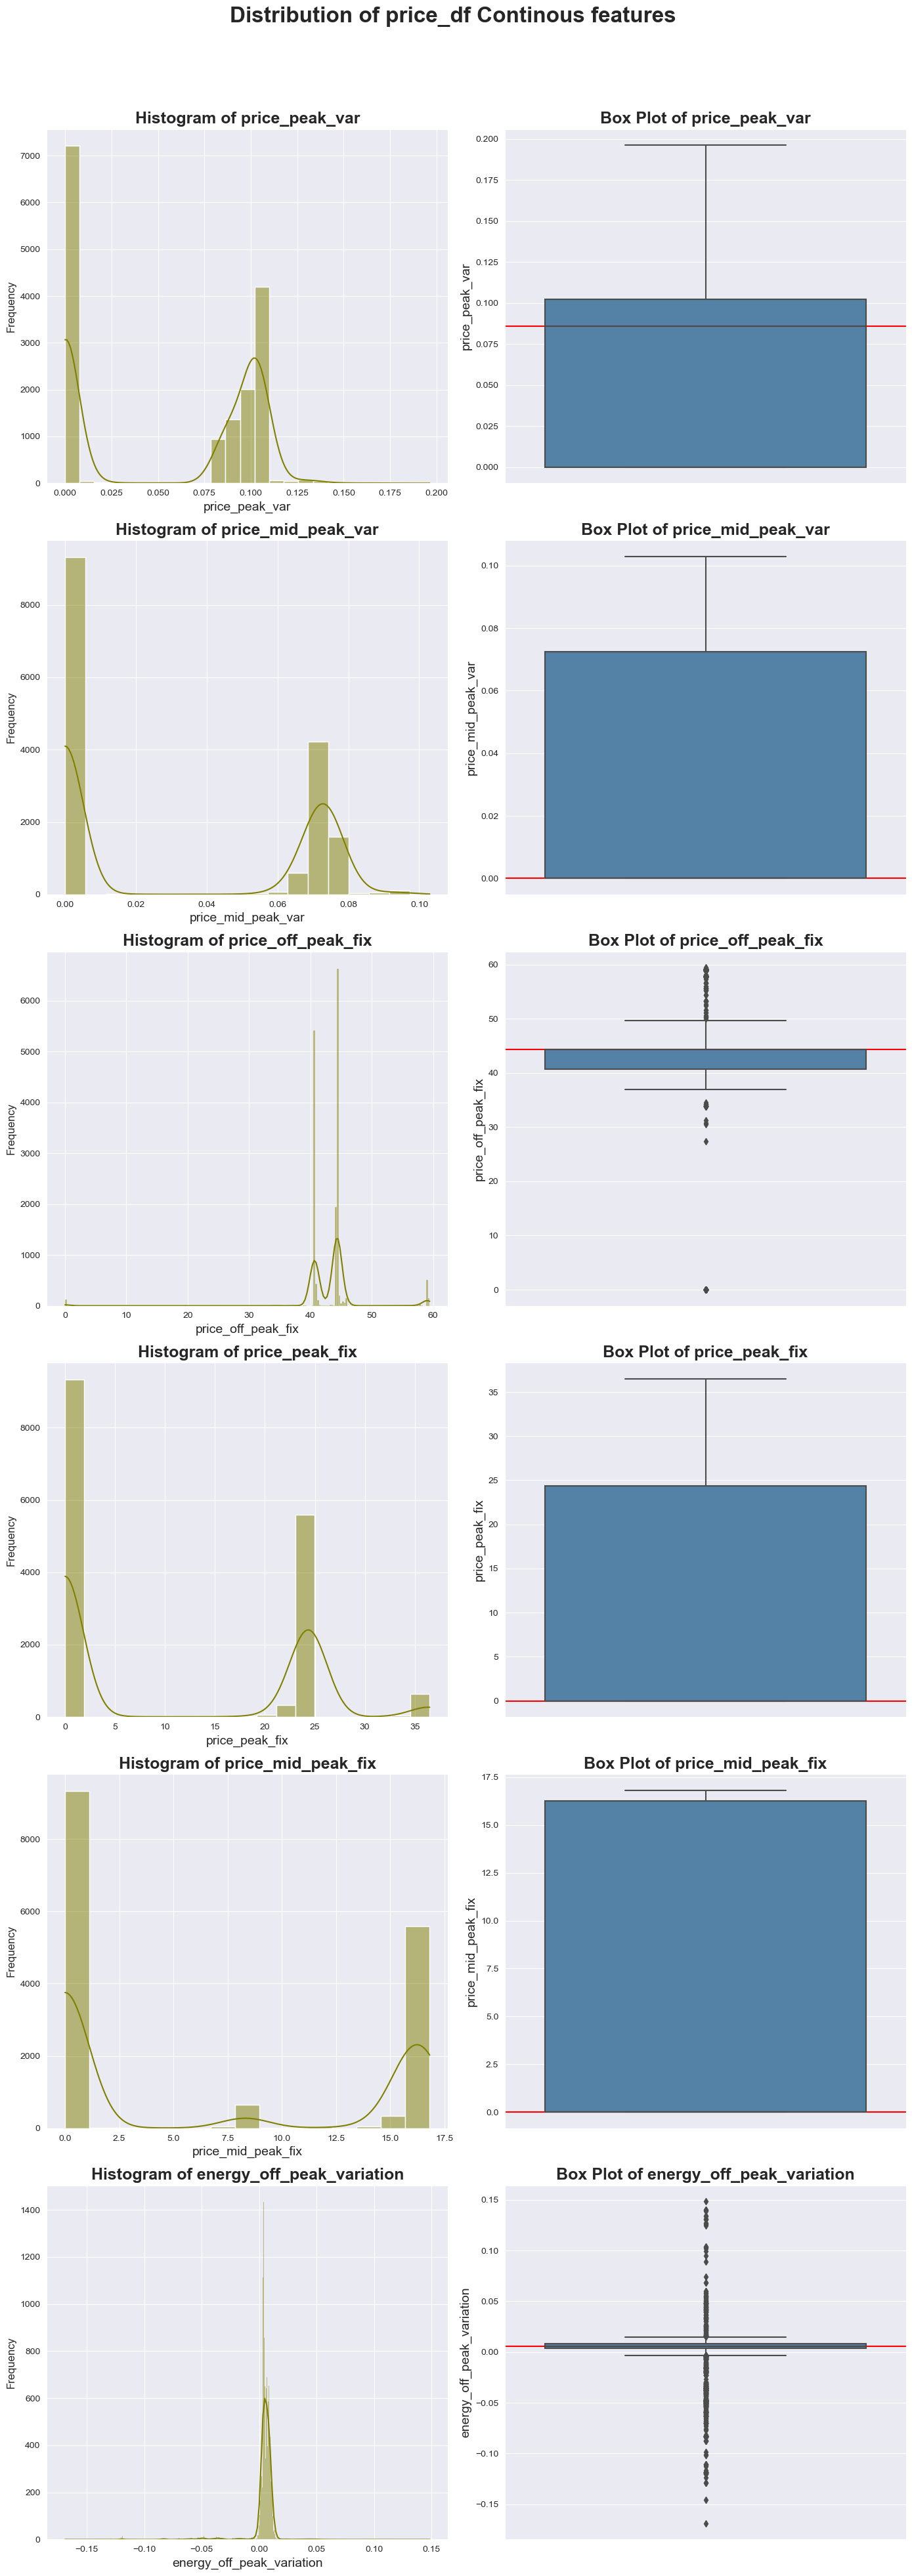

In [27]:
cont_features = list(price_df.columns[(price_df.dtypes != 'object') & (price_df.dtypes != 'datetime64[ns]') & (price_df.nunique() >= 20)])
plot_continous_features(price_df, 
                        cont_features, 
                        df_name = 'price_df', 
                        figsize= (14, 40))

* The values of each feature are centred around some points.
* There are lots of 0 peak prices and mid-peak prices, but very few 0 off peak prices. So, analyse price sensivity only based on   off-peak prices.

To enhance graph interpretability, we categorize the eight unique channel sales as A through H.

## Barplot of Categorical Features

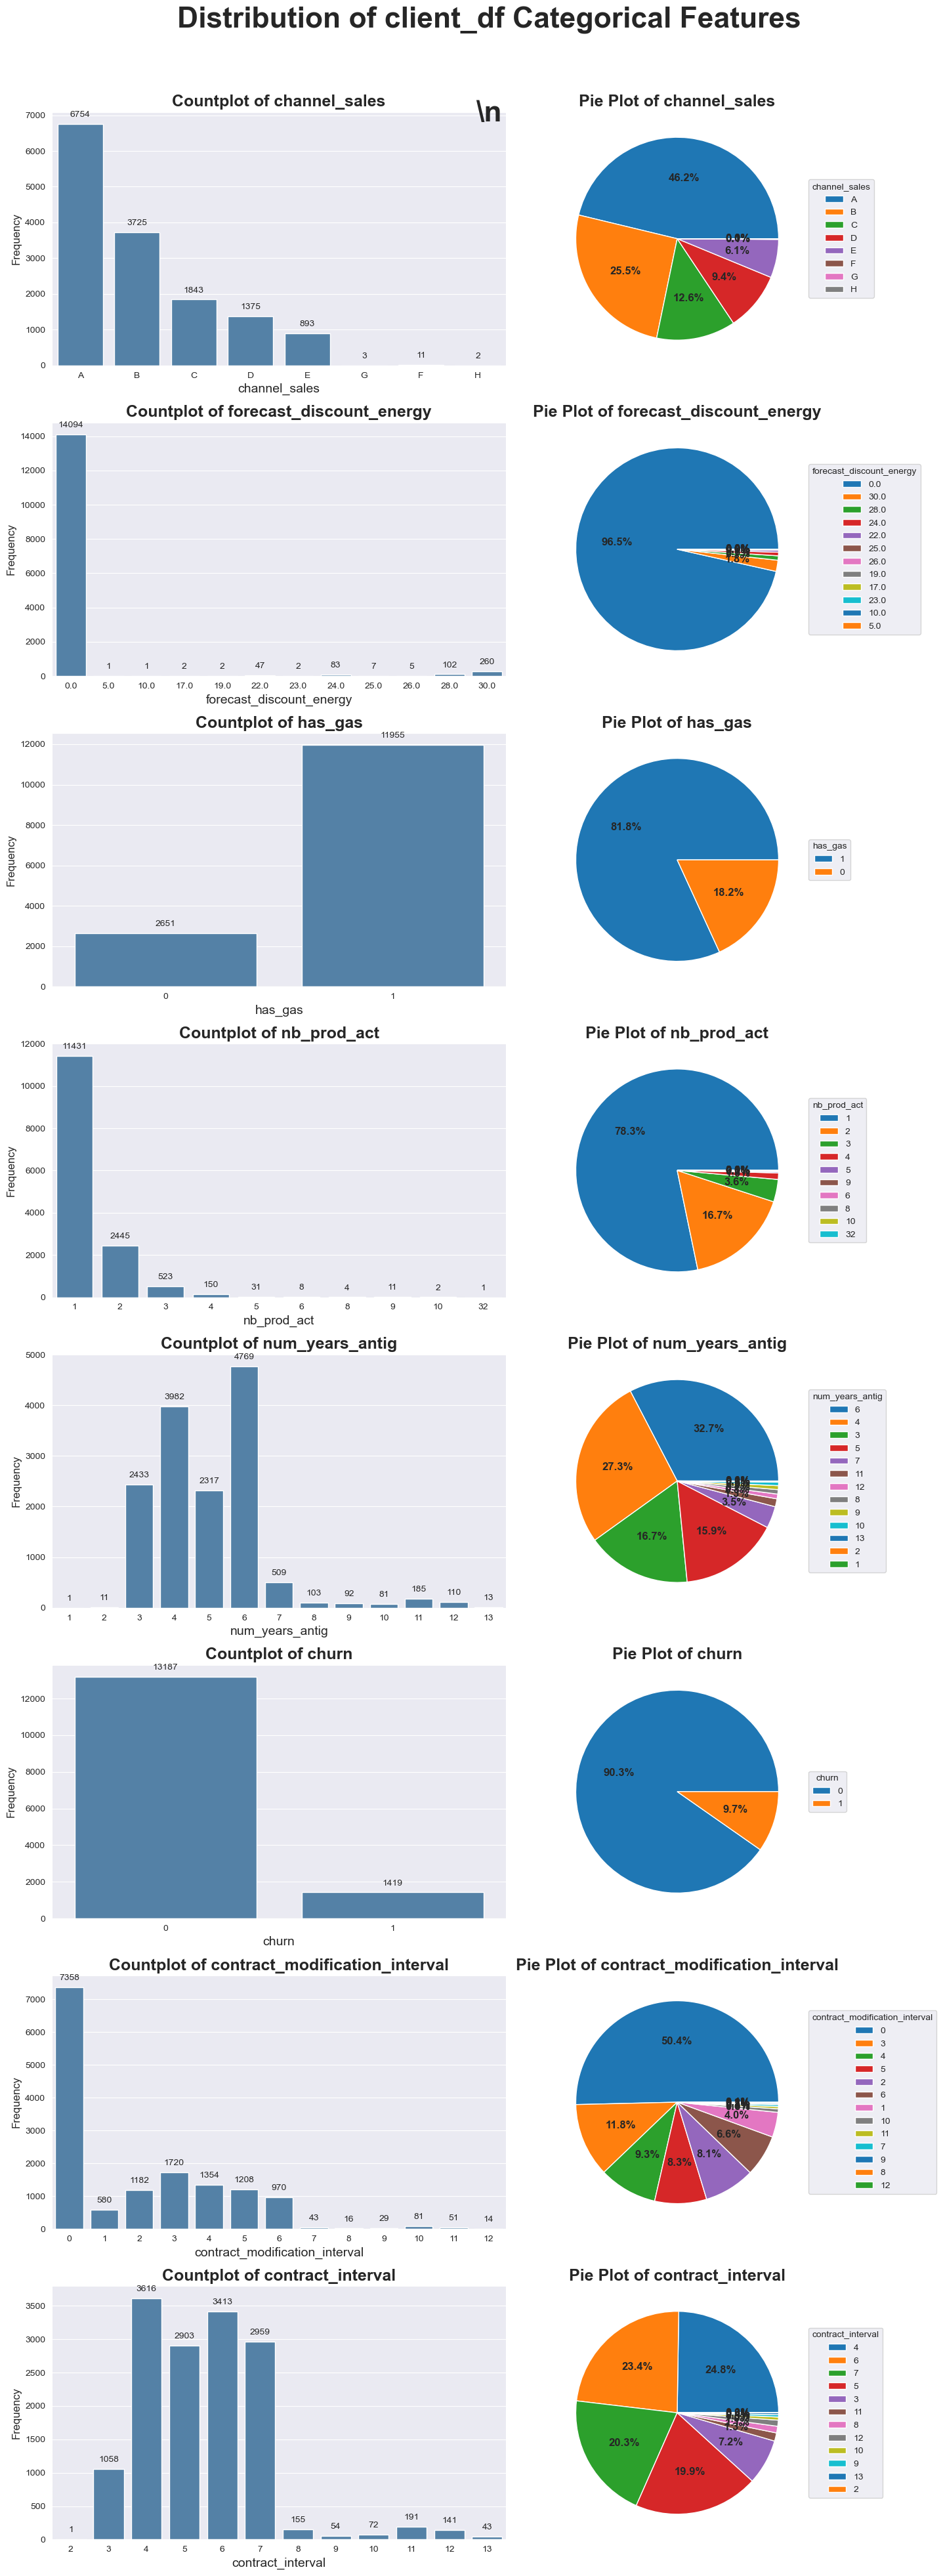

In [28]:
def piecat_plot(df, cat_features, df_name):
    n_rows = len(cat_features)
    n_cols = 2
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 40))
    axs = axs.flatten()

    for i, feature in enumerate(cat_features):
        # Countplot
        sns.countplot(data=df, x=feature, color="steelblue", ax=axs[2*i])

        axs[2*i].set_xlabel(feature, fontsize=14)
        axs[2*i].set_ylabel('Frequency', fontsize=12)
        axs[2*i].set_title(f'Countplot of {feature}', fontsize=18, fontweight='bold')

        # Annotation for countplot
        for p in axs[2*i].patches:
            axs[2*i].annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center',
                             va='center',
                             xytext=(0, 10),
                             textcoords='offset points')

        # Pie Chart
        axs[2*i+1].set_title(f'Pie Plot of {feature}', fontsize=18, fontweight='bold')
        pie_data = df[feature].value_counts()
        wedges, _, autotexts = axs[2*i+1].pie(pie_data,
                                              autopct='%1.1f%%')
        axs[2*i+1].legend(wedges, pie_data.index, title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.setp(autotexts, size=12, weight="bold")

    fig.suptitle(f"Distribution of {df_name} Categorical Features\n\n\n\\n", fontsize=32, weight='bold')
    fig.tight_layout()
    plt.show()

cat_features = list(client_df.columns[(client_df.nunique() < 20) & (client_df.dtypes != 'datetime64[ns]')])
cat_features.remove("origin_up")
piecat_plot(client_df, cat_features, df_name='client_df')

* D channel sales  is the most common electricty campaign that customers first subscribed to. Very few customers first             subscribed to channel sales A, B and C electricity campaign.

* The vast majority of cutomers' forecasted value of current discount is 0.

* Only 18.15% of the clients were also gas clients and remaining 81.8% of the clients were electricity clients.
* most cutomers have 1 or 2 active product and services

* The majority of clients have been associated with us for a period ranging from 3 to 6 years.

In [29]:
 #define a function to plot bar chart to display a feature's distribution with percent labels.
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = client_df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)

# plot stacked bar chart with percent label by churn
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable, if_sort=False, figsize=(9,6)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

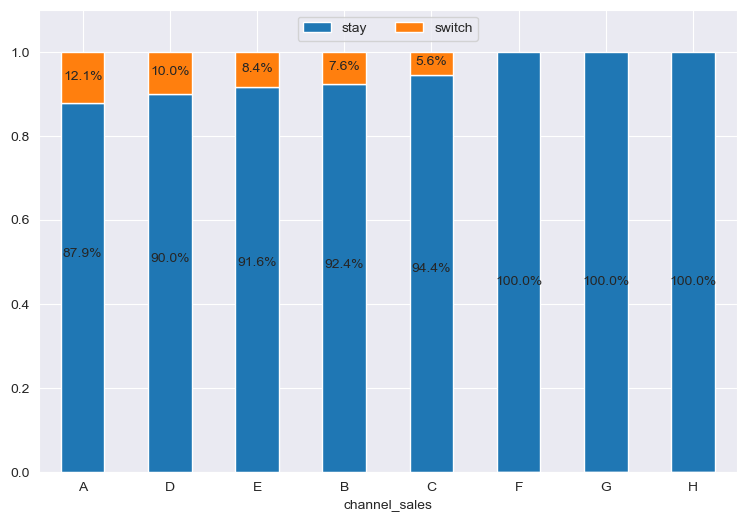

In [30]:
plot_stacked_bar_with_percent_label_by_churn(df=merged_df, target_variable='channel_sales', if_sort=True)

There are no categorical features in price_df


* For the customers who first subscribed to different electricity campaigns, the proportion of churning customers ranges from     5.6%  12.1%.customers of channel sales A are more likely to switch.


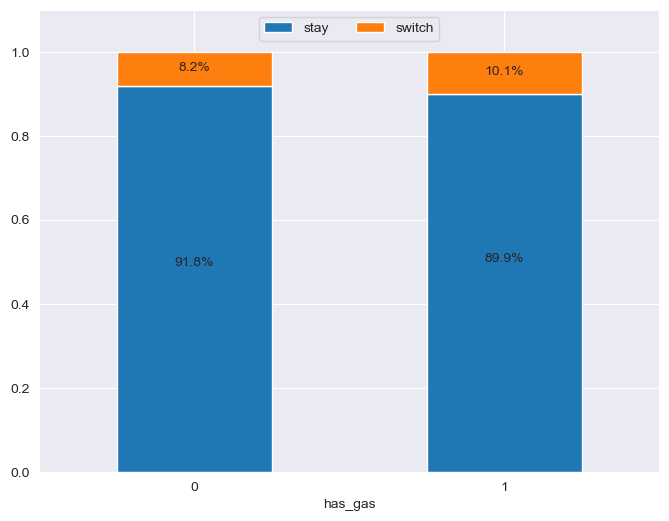

In [31]:
plot_stacked_bar_with_percent_label_by_churn(df=merged_df, target_variable='has_gas', if_sort=False, figsize=(8,6))

* Electricity clients are more likely to churn than electricity and gas clients.

#  Pairplot of merged_df

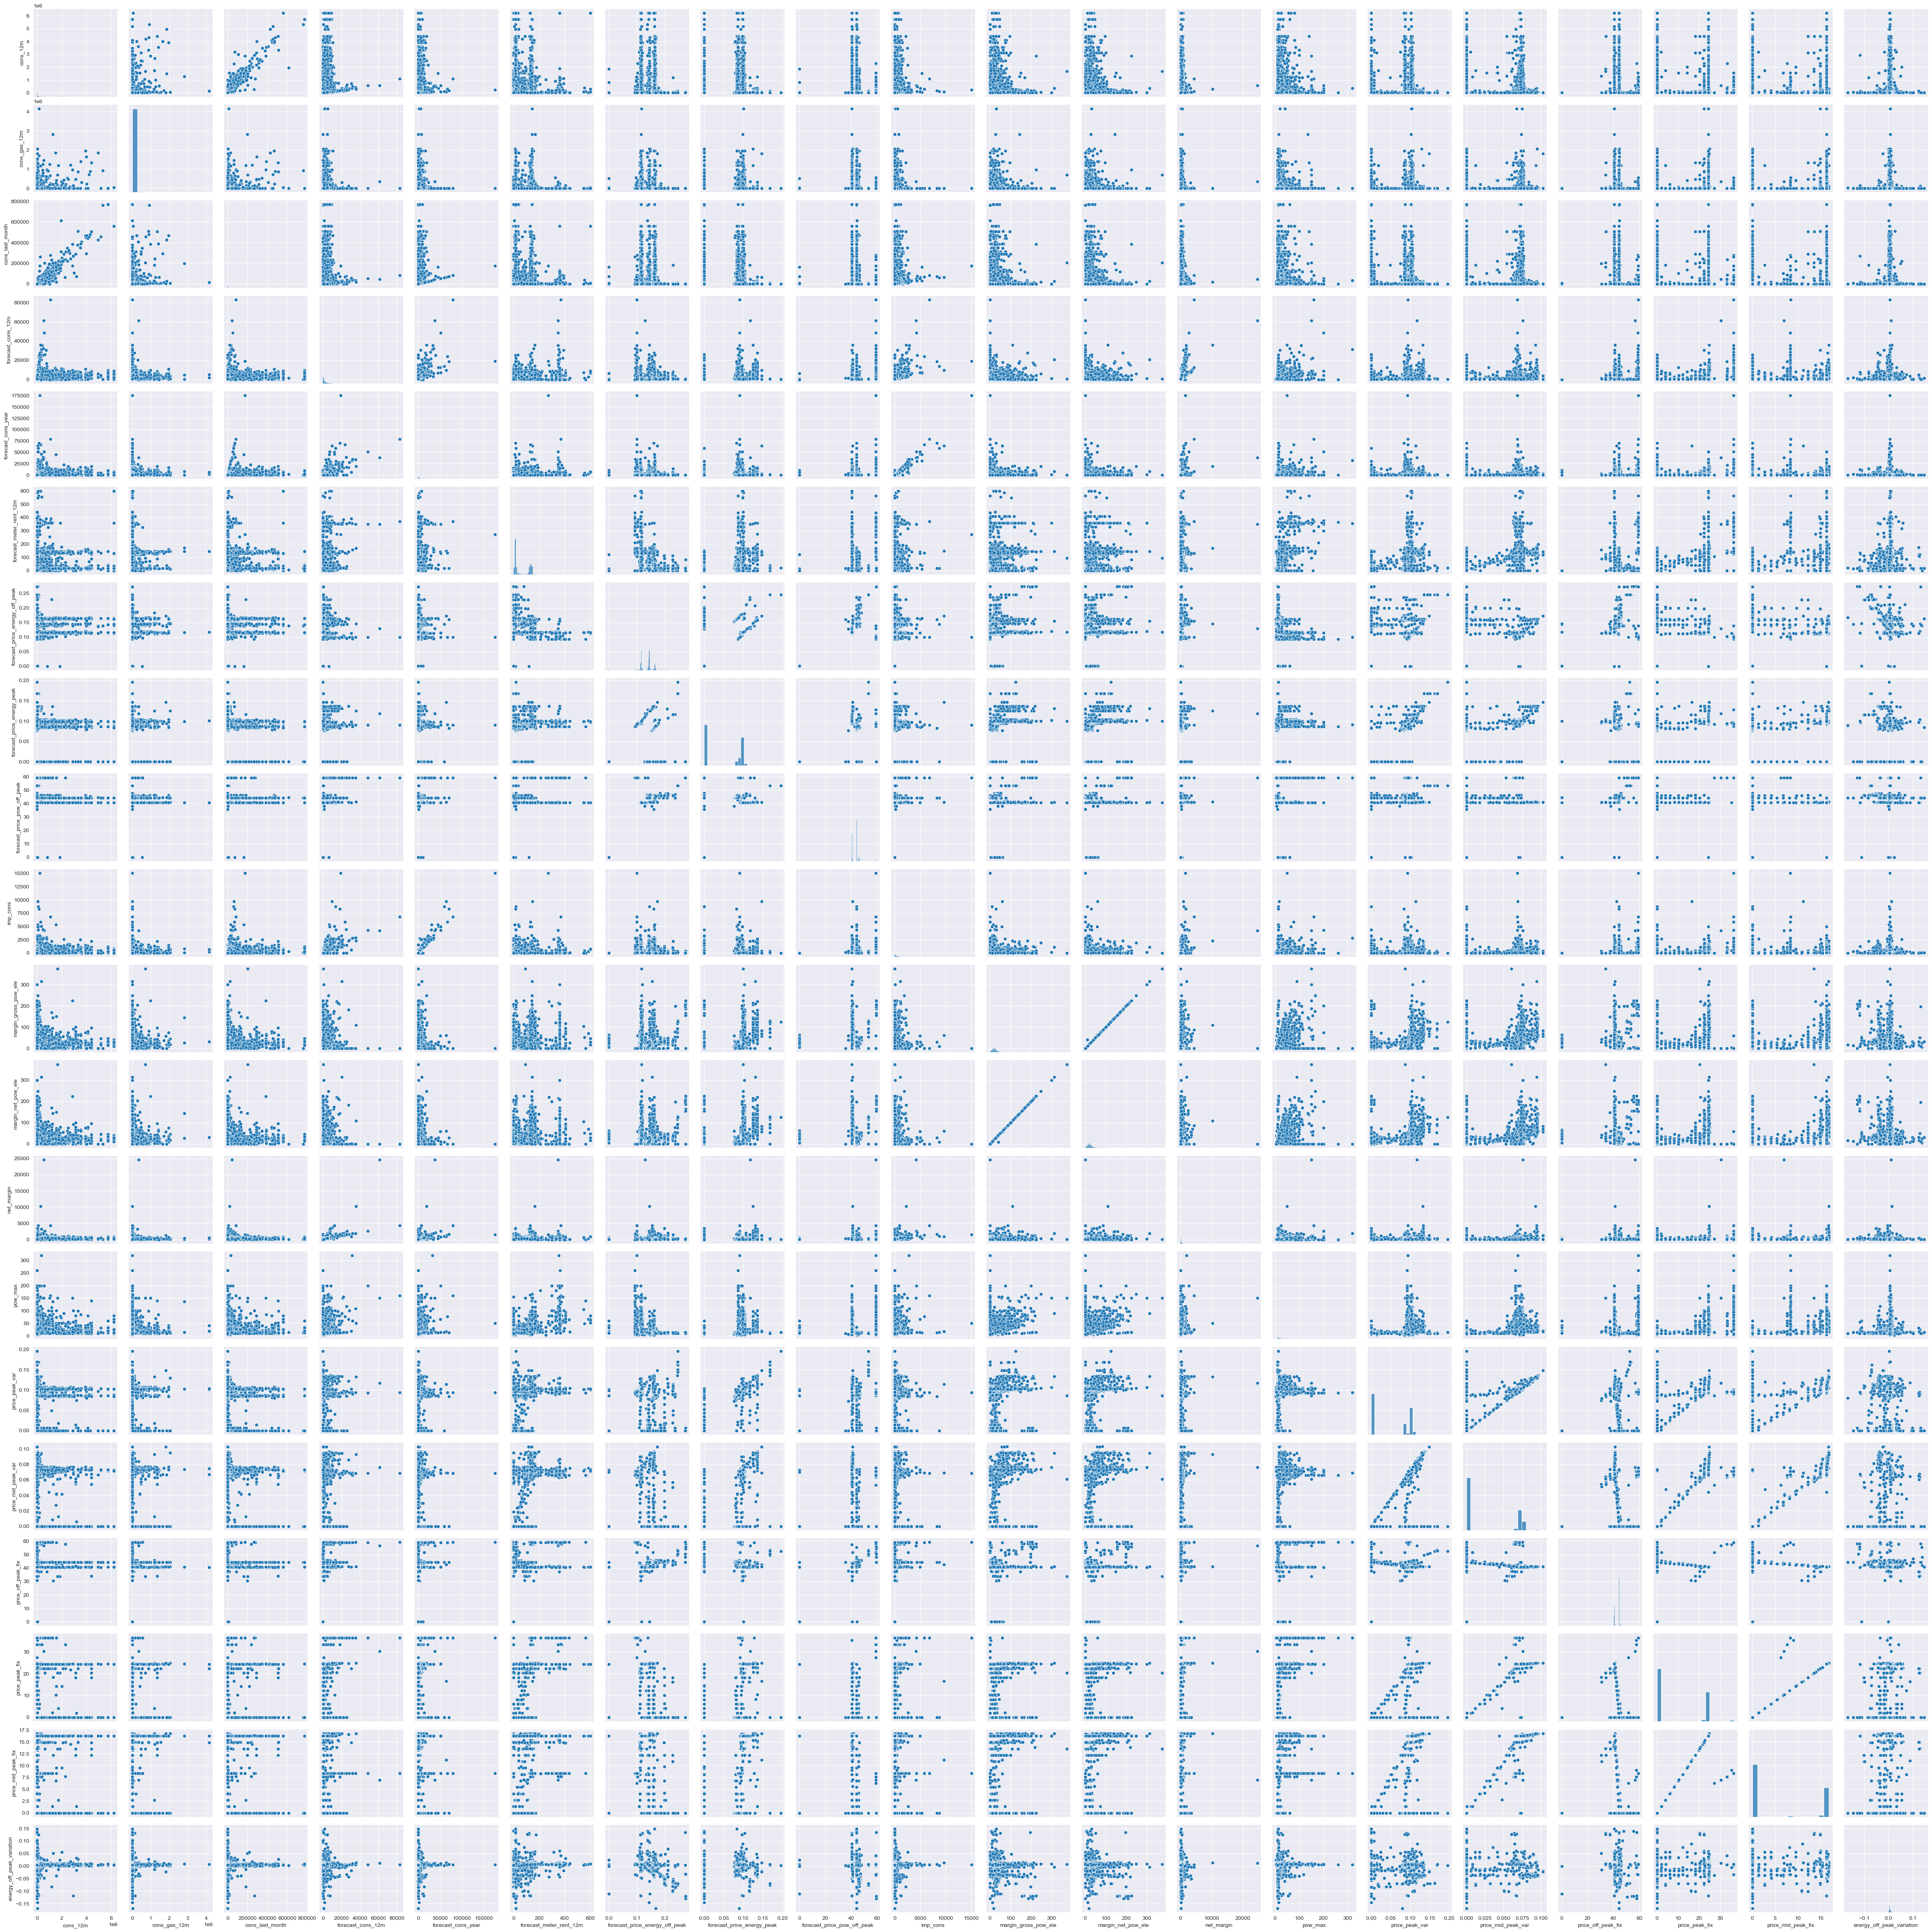

In [32]:
cont_features = list(merged_df.columns[(merged_df.dtypes != 'object') & (merged_df.dtypes != 'datetime64[ns]') & (merged_df.nunique() >= 20)])
sns.pairplot(merged_df[cont_features])
plt.show()

## Plotting Energy and Power prices

In [33]:
client_data = pd.read_csv("C:/Users/Priya/Desktop/pyhton & ML/customer churn/client_data.csv")
price_data  = pd.read_csv("C:/Users/Priya/Desktop/pyhton & ML/customer churn/price_data.xls")


In [34]:
#Spliting the dataset into chrun and non-churn price by price date
client_churn_info = client_data[['id','churn']]
price_df1 = client_churn_info.merge(price_data,on='id')
churn_grp_price = price_df1[price_df1['churn']==1].groupby(['price_date']).mean()
non_churn_grp_price = price_df1[price_df1['churn']==0].groupby('price_date').mean()

C:\Users\Priya\AppData\Local\Temp\ipykernel_16984\2705217507.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  churn_grp_price = price_df1[price_df1['churn']==1].groupby(['price_date']).mean()
C:\Users\Priya\AppData\Local\Temp\ipykernel_16984\2705217507.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  non_churn_grp_price = price_df1[price_df1['churn']==0].groupby('price_date').mean()


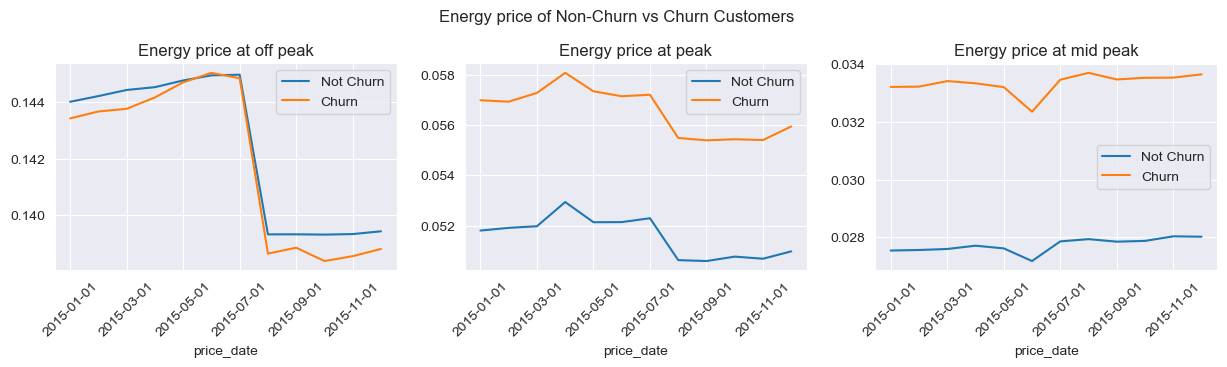

In [35]:
#Plotting average price of energy by month 
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
plt.subplot(131)
non_churn_grp_price.price_off_peak_var.plot()
churn_grp_price.price_off_peak_var.plot()
plt.xticks(rotation=45)
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at off peak')
plt.subplot(132)
non_churn_grp_price.price_peak_var.plot()
churn_grp_price.price_peak_var.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at peak')
plt.xticks(rotation=45)
plt.subplot(133)
non_churn_grp_price.price_mid_peak_var.plot()
churn_grp_price.price_mid_peak_var.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at mid peak')
plt.xticks(rotation=45)
plt.suptitle('Energy price of Non-Churn vs Churn Customers')
plt.subplots_adjust(top=0.8)
plt.show()

There is some variation of price between churn and un-churn clients. Churned clients have slightly low off-peak energy prices and high off-peak prices. But we can't confidently say this is the factor for churn. We need to analyze the data further to arrive at a concrete conclusion.

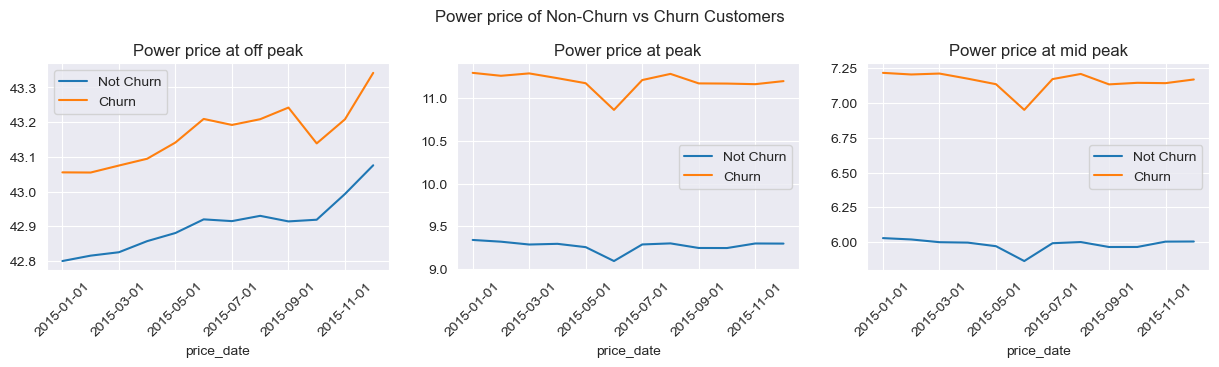

In [36]:
#Plotting average price of power by month
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
plt.subplot(131)
non_churn_grp_price.price_off_peak_fix.plot()
churn_grp_price.price_off_peak_fix.plot()
plt.xticks(rotation=45)
plt.legend(['Not Churn','Churn'])
plt.title('Power price at off peak')
plt.subplot(132)
non_churn_grp_price.price_peak_fix.plot()
churn_grp_price.price_peak_fix.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Power price at peak')
plt.xticks(rotation=45)
plt.subplot(133)
non_churn_grp_price.price_mid_peak_fix.plot()
churn_grp_price.price_mid_peak_fix.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Power price at mid peak')
plt.xticks(rotation=45)
plt.suptitle('Power price of Non-Churn vs Churn Customers')
plt.subplots_adjust(top=0.8)
plt.show()

There is some variation of price between churn and un-churn clients. Churned clients have high off-peak power prices and high off-peak prices. But we can't confidently say this is the factor for churn. We need to analyze the data further to arrive at a concrete conclusion.

##  Can changes in price influence customer churn?

In [37]:

stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price_data.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_,
                                                      'price_off_peak_fix': stat_, 'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})
# flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(3)


id  price_off_peak_var_max  \
0  0002203ffbb812588b632b9e628cc38d                0.128067   
1  0004351ebdd665e6ee664792efc4fd13                0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                0.205742   

   price_off_peak_var_min  price_off_peak_var_mean  price_peak_var_max  \
0                0.119906                 0.124338            0.105842   
1                0.143943                 0.146426            0.000000   
2                0.150837                 0.181558            0.000000   

   price_peak_var_min  price_peak_var_mean  price_mid_peak_var_max  \
0            0.101673             0.103794                0.073773   
1            0.000000             0.000000                0.000000   
2            0.000000             0.000000                0.000000   

   price_mid_peak_var_min  price_mid_peak_var_mean  price_off_peak_fix_max  \
0                0.070232                  0.07316               40.728885   
1                0.000000                  0.00000               44.444710   
2                0.000000                  0.00000               45.944710   

   price_off_peak_fix_min  price_off_peak_fix_mean  price_peak_fix_max  \
0               40.565969                40.701732            24.43733   
1               44.266931                44.385450             0.00000   
2               44.444710                45.319710             0.00000   

   price_peak_fix_min  price_peak_fix_mean  price_mid_peak_fix_max  \
0           24.339581            24.421038               16.291555   
1            0.000000             0.000000                0.000000   
2            0.000000             0.000000                0.000000   

   price_mid_peak_fix_min  price_mid_peak_fix_mean  
0               16.226389                16.280694  
1                0.000000                 0.000000  
2                0.000000                 0.000000

In [38]:
# add churn values
price_stat = price_stat.merge(client_data[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset 
price_stat = price_stat.dropna(subset=['churn']).reset_index(drop=True)
price_stat.head(3)


id  price_off_peak_var_max  \
0  0002203ffbb812588b632b9e628cc38d                0.128067   
1  0004351ebdd665e6ee664792efc4fd13                0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                0.205742   

   price_off_peak_var_min  price_off_peak_var_mean  price_peak_var_max  \
0                0.119906                 0.124338            0.105842   
1                0.143943                 0.146426            0.000000   
2                0.150837                 0.181558            0.000000   

   price_peak_var_min  price_peak_var_mean  price_mid_peak_var_max  \
0            0.101673             0.103794                0.073773   
1            0.000000             0.000000                0.000000   
2            0.000000             0.000000                0.000000   

   price_mid_peak_var_min  price_mid_peak_var_mean  price_off_peak_fix_max  \
0                0.070232                  0.07316               40.728885   
1                0.000000                  0.00000               44.444710   
2                0.000000                  0.00000               45.944710   

   price_off_peak_fix_min  price_off_peak_fix_mean  price_peak_fix_max  \
0               40.565969                40.701732            24.43733   
1               44.266931                44.385450             0.00000   
2               44.444710                45.319710             0.00000   

   price_peak_fix_min  price_peak_fix_mean  price_mid_peak_fix_max  \
0           24.339581            24.421038               16.291555   
1            0.000000             0.000000                0.000000   
2            0.000000             0.000000                0.000000   

   price_mid_peak_fix_min  price_mid_peak_fix_mean  churn  
0               16.226389                16.280694    0.0  
1                0.000000                 0.000000    0.0  
2                0.000000                 0.000000    0.0

In [39]:

 for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = price_data[price_data['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
#
price_stat.head(3)

id  price_off_peak_var_max  \
0  0002203ffbb812588b632b9e628cc38d                0.128067   
1  0004351ebdd665e6ee664792efc4fd13                0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                0.205742   

   price_off_peak_var_min  price_off_peak_var_mean  price_peak_var_max  \
0                0.119906                 0.124338            0.105842   
1                0.143943                 0.146426            0.000000   
2                0.150837                 0.181558            0.000000   

   price_peak_var_min  price_peak_var_mean  price_mid_peak_var_max  \
0            0.101673             0.103794                0.073773   
1            0.000000             0.000000                0.000000   
2            0.000000             0.000000                0.000000   

   price_mid_peak_var_min  price_mid_peak_var_mean  ...  \
0                0.070232                  0.07316  ...   
1                0.000000                  0.00000  ...   
2                0.000000                  0.00000  ...   

   price_mid_peak_fix_max  price_mid_peak_fix_min  price_mid_peak_fix_mean  \
0               16.291555               16.226389                16.280694   
1                0.000000                0.000000                 0.000000   
2                0.000000                0.000000                 0.000000   

   churn  diff_Dec_mean_price_off_peak_var  diff_Dec_mean_price_peak_var  \
0    0.0                         -0.004432                     -0.002121   
1    0.0                         -0.002483                      0.000000   
2    0.0                          0.019722                      0.000000   

   diff_Dec_mean_price_mid_peak_var  diff_Dec_mean_price_off_peak_fix  \
0                          0.000559                          0.027153   
1                          0.000000                          0.059260   
2                          0.000000                          0.625000   

   diff_Dec_mean_price_peak_fix  diff_Dec_mean_price_mid_peak_fix  
0                      0.016292                          0.010861  
1                      0.000000                          0.000000  
2                      0.000000                          0.000000  

[3 rows x 26 columns]

* Among the cutomers whose off-peak enery prices increased, around 9.72% of customers changed their providers.

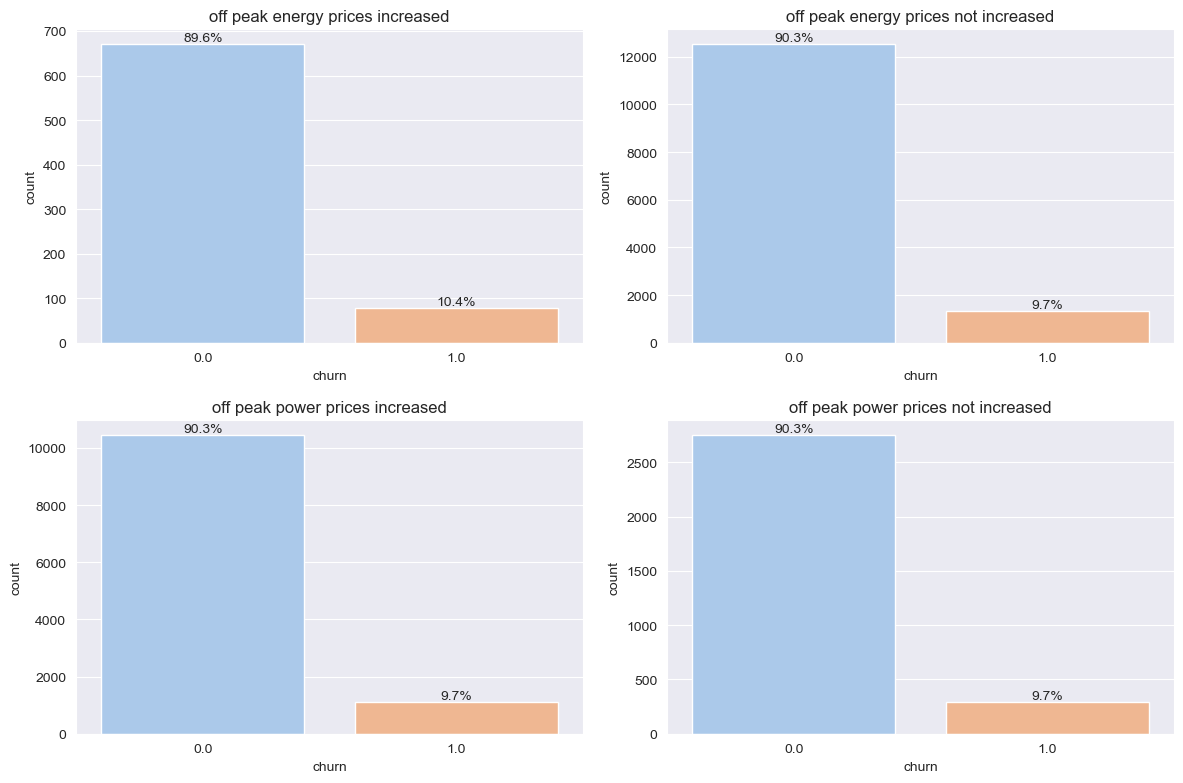

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_chart_with_percent_label(ax, df, target_variable, gap_label_bar=0.02, title=None):
    sns.set(style="whitegrid")
    sns.countplot(x=target_variable, data=df, palette="pastel", ax=ax)
    
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.1%}', 
                    xy=(p.get_x() + p.get_width() / 2., height), 
                    xytext=(0, gap_label_bar), 
                    textcoords='offset points', 
                    ha='center', 
                    va='bottom', 
                    fontsize=10)
    
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot on each subplot
plot_bar_chart_with_percent_label(ax = axes[0,0],df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02,title = "off peak energy prices increased")
plot_bar_chart_with_percent_label(ax = axes[0,1],df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02,title = "off peak energy prices not increased")
plot_bar_chart_with_percent_label(ax = axes[1,0],df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02,title = "off peak power prices increased")
plot_bar_chart_with_percent_label(ax = axes[1,1],df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']<=0], target_variable='churn', gap_label_bar=0.02,title = "off peak power prices not increased")

# Add more plots for the remaining subplots

# Adjust layout
plt.tight_layout()
plt.show()



Based on the above graphs, it's evident that regardless of price fluctuations, the percentage of customers who churned consistently remained at approximately 9.72%. This implies that variations in prices did not influence customer churn behavior. Hence, it can be deduced that customers were not responsive to changes in pricing.

# Correlation Heatmap of Numerical Features

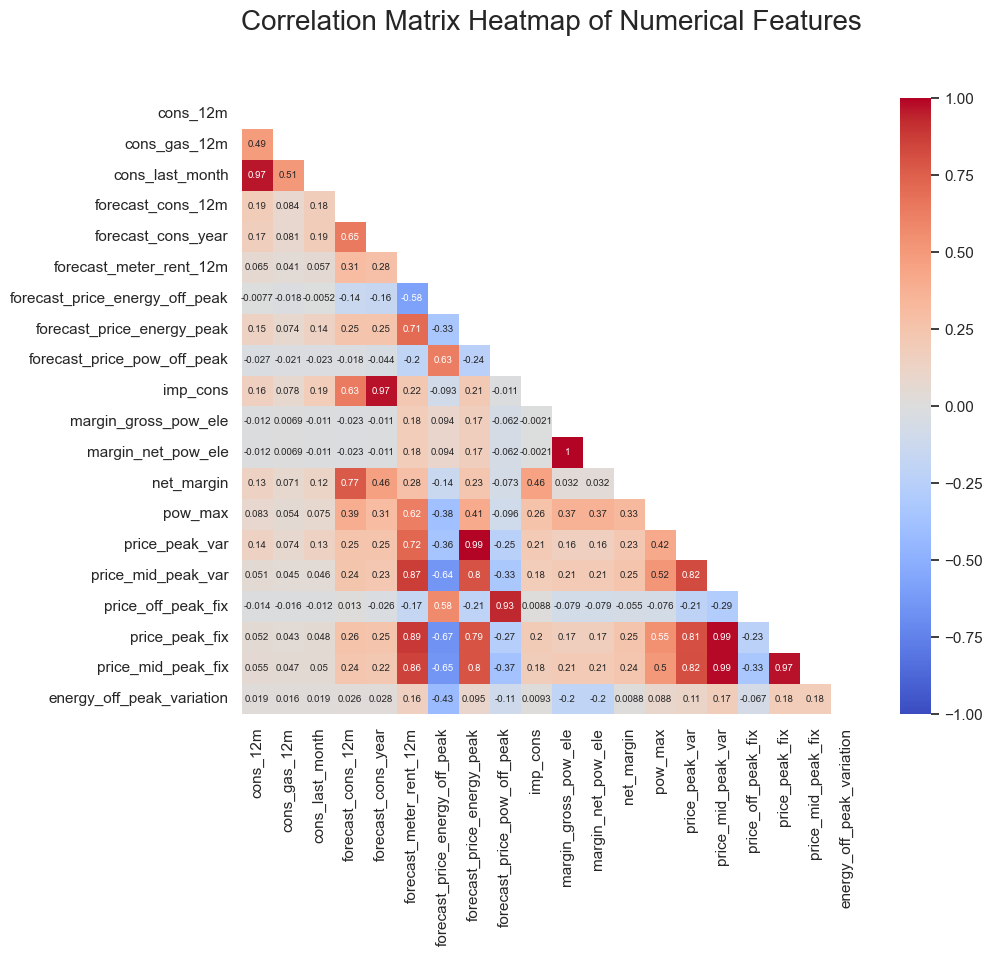

In [41]:
corr_matrix = merged_df[cont_features].corr()

# Create a mask to plot only the lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            annot_kws={'size': 7}, 
            cmap='coolwarm', 
            square=False, 
            mask=mask,  
            vmin=-1, 
            vmax=1)

plt.title('Correlation Matrix Heatmap of Numerical Features\n\n', fontsize=20)
plt.show()

### dropping highly correlated columns 

In [42]:
merged_df.drop(['price_peak_var','price_peak_fix','price_mid_peak_var',#Highly correlated columns
    'cons_last_month','forecast_cons_12m', 'forecast_cons_year','forecast_meter_rent_12m',
    'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 
    'forecast_price_pow_off_peak','margin_gross_pow_ele', 'nb_prod_act',
    'num_years_antig',
    #Unwanted Columns
    'id','date_activ','date_end','date_renewal','date_modif_prod',
],axis=1,inplace=True)

### duplicate columns 

In [43]:
merged_df[merged_df.duplicated(subset=['cons_12m',
       'imp_cons', 'net_margin',
       'pow_max', 'churn', 'price_off_peak_fix', 'price_mid_peak_fix',
       'energy_off_peak_variation'])]

channel_sales  cons_12m  cons_gas_12m  forecast_discount_energy  \
759               B         0             0                       0.0   
1660              B         0         24908                       0.0   
6735              B         0             0                       0.0   
6806              B         0             0                       0.0   
6959              B         0             0                       0.0   
8195              B         0             0                       0.0   
10316             B         0             0                       0.0   
10597             B         0             0                       0.0   
11470             B         0             0                       0.0   
11713             B         0             0                       0.0   
12459             B         0          3556                       0.0   
13033             B         0             0                       0.0   
14144             B         0             0                       0.0   

       has_gas  imp_cons  margin_net_pow_ele  net_margin origin_up  pow_max  \
759          1       0.0                0.12         0.0  origin_3     95.0   
1660         0       0.0                0.12         0.0  origin_3     60.0   
6735         1       0.0                0.12         0.0  origin_3     60.0   
6806         1       0.0                0.00         0.0  origin_3      9.9   
6959         1       0.0                0.12         0.0  origin_3     80.0   
8195         1       0.0                0.12         0.0  origin_3     60.0   
10316        1       0.0                0.12         0.0  origin_3     40.0   
10597        1       0.0                0.00         0.0  origin_3     30.0   
11470        1       0.0                0.12         0.0  origin_3     35.0   
11713        1       0.0                0.12         0.0  origin_3     80.0   
12459        0       0.0                0.12         0.0  origin_3     95.0   
13033        1       0.0                0.00         0.0  origin_3     30.0   
14144        1       0.0                0.12         0.0  origin_3     40.0   

       churn  contract_modification_interval  contract_interval  \
759        0                               0                  8   
1660       0                               0                  8   
6735       0                               0                  8   
6806       0                               0                  8   
6959       0                               0                  8   
8195       0                               5                  7   
10316      0                               0                  8   
10597      0                               0                  8   
11470      0                               0                  7   
11713      0                               0                  7   
12459      0                               0                  7   
13033      0                               0                  6   
14144      0                               0                  8   

       price_off_peak_fix  price_mid_peak_fix  energy_off_peak_variation  
759             59.173468            8.367731                   0.005795  
1660            59.173468            8.367731                   0.005795  
6735            59.173468            8.367731                   0.005795  
6806            59.173468            8.367731                   0.005795  
6959            59.173468            8.367731                   0.005795  
8195            59.173468            8.367731                   0.005795  
10316           59.173468            8.367731                   0.005795  
10597           59.173468            8.367731                   0.005795  
11470           59.173468            8.367731                   0.005795  
11713           59.173468            8.367731                   0.005795  
12459           59.173468            8.367731                   0.005795  
13033           59.173468            

In [44]:
merged_df.drop_duplicates(subset=['cons_12m',
       'imp_cons', 'net_margin',
       'pow_max', 'churn', 'price_off_peak_fix', 'price_mid_peak_fix',
       'energy_off_peak_variation'],ignore_index=True,inplace=True)

# Using Chi Test to find Relationship Between Categorical features and Churn

In [45]:
from scipy.stats import chi2_contingency
import pandas as pd

target_feature = 'churn'
cat_features = list(merged_df.columns[(merged_df.dtypes == 'object') & (merged_df.nunique() <= 20)])

significant_variables = {}
for predictor in cat_features:
    # Create contingency table
    contingency_table = pd.crosstab(merged_df[target_feature], merged_df[predictor])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)

    # Check if variable is significant
    if p_val < 0.05:
        significant_variables[predictor] = [p_val]

results_df = pd.DataFrame(significant_variables)
results_df = results_df.rename_axis('Significant Variable')
results_df.T

Significant Variable             0
channel_sales         2.397133e-19
origin_up             1.167793e-28

* p value of channel sales , has_gas,origin_up having extremely small p value .This indicates that the relationship between the 'churn' behavior and the  categorical variables is highly significant.

### Using Mutual Info Test to find Relationship Between Numerical features and Churn

In [46]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

num_features = list(merged_df.columns[(merged_df.dtypes != 'object') & (merged_df.dtypes != 'datetime64[ns]')])
target_feature = 'churn'

X = merged_df[num_features]
y = merged_df[target_feature]

# Perform feature selection using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X, y)

scores = selector.scores_

results = pd.DataFrame({'Feature': num_features, 'Score': scores})
results = results.sort_values(by='Score', ascending=False)
print(results)

                           Feature     Score
8                            churn  0.319075
0                         cons_12m  0.020648
5               margin_net_pow_ele  0.015833
3                          has_gas  0.006960
1                     cons_gas_12m  0.005030
7                          pow_max  0.004934
13       energy_off_peak_variation  0.004543
6                       net_margin  0.004422
9   contract_modification_interval  0.002728
11              price_off_peak_fix  0.002186
12              price_mid_peak_fix  0.001963
10               contract_interval  0.001451
2         forecast_discount_energy  0.001286
4                         imp_cons  0.001196


* high mutual information score indicates a strong relationship between the numeric variable and target variable 

### Handling Outliers

In [47]:
def iqr_range(arr):
    q1 = np.quantile(arr,0.25)
    q3 = np.quantile(arr,0.75)
    iqr = q3-q1
    return q1-(iqr*1.5),q3+(iqr*1.5)

In [48]:
def outlier_removal(df,column,drop_percentage=0.05):
    
    actual_rows = df.shape[0]
    lower_bound,upper_bound = iqr_range(df[column].values)
    outliers = df[ (df[column]<lower_bound) | (df[column]>upper_bound) ]
    print('Total No of rows in actual dataframe : ',actual_rows,'\nTotal No of rows in outliers : ',outliers.shape[0])
    if outliers.shape[0] <= round(actual_rows*drop_percentage):
        df.drop(outliers.index,inplace=True)
    
    return df

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Load your dataset and specify the column for which you want to remove outliers
# df = ...

# Define a function to calculate the IQR range
def iqr_range(arr):
    q1 = np.quantile(arr, 0.25)
    q3 = np.quantile(arr, 0.75)
    iqr = q3 - q1
    return q1 - (iqr * 1.5), q3 + (iqr * 1.5)

def outlier_removal(df, column, drop_percentage=0.05):
    # Create a copy of the dataframe
    
    
    # Initialize RobustScaler
    scaler = RobustScaler()
    
    # Scale the column using RobustScaler
    scaled_column = scaler.fit_transform(df[[column]])
    
    # Calculate IQR range for scaled column
    lower_bound, upper_bound = iqr_range(scaled_column)
    
    # Identify and remove outliers
    outliers = df[(scaled_column < lower_bound) | (scaled_column > upper_bound)]
    print('Total No of rows in actual dataframe:', df.shape[0], '\nTotal No of rows in outliers:', outliers.shape[0])
    
    if outliers.shape[0] <= round(df.shape[0] * drop_percentage):
        df.drop(outliers.index, inplace=True)
    
    return df


In [50]:
# Define the list of columns for which you want to remove outliers
columns_to_remove_outliers = ['cons_12m', 'cons_gas_12m', 'imp_cons', 'margin_net_pow_ele', 'net_margin', 
       'pow_max']

# Loop through the columns and perform outlier removal
for col in columns_to_remove_outliers:
    client_df = outlier_removal(client_df, col, 0.08)
    print(client_df.churn.value_counts())

Total No of rows in actual dataframe: 14606 
Total No of rows in outliers: 2084
0    13187
1     1419
Name: churn, dtype: int64
Total No of rows in actual dataframe: 14606 
Total No of rows in outliers: 2612
0    13187
1     1419
Name: churn, dtype: int64
Total No of rows in actual dataframe: 14606 
Total No of rows in outliers: 1215
0    13187
1     1419
Name: churn, dtype: int64
Total No of rows in actual dataframe: 14606 
Total No of rows in outliers: 660
0    12648
1     1298
Name: churn, dtype: int64
Total No of rows in actual dataframe: 13946 
Total No of rows in outliers: 979
0    11777
1     1190
Name: churn, dtype: int64
Total No of rows in actual dataframe: 12967 
Total No of rows in outliers: 1202
0    11777
1     1190
Name: churn, dtype: int64


In [51]:
for col in ['cons_12m', 'cons_gas_12m', 'net_margin','imp_cons','forecast_price_pow_off_peak','forecast_meter_rent_12m','forecast_discount_energy',
       'pow_max','nb_prod_act','margin_net_pow_ele','margin_gross_pow_ele','forecast_price_energy_peak']:
    client_df = outlier_removal(client_df,col,0.08)
    print(client_df.churn.value_counts())

Total No of rows in actual dataframe: 12967 
Total No of rows in outliers: 1739
0    11777
1     1190
Name: churn, dtype: int64
Total No of rows in actual dataframe: 12967 
Total No of rows in outliers: 2237
0    11777
1     1190
Name: churn, dtype: int64
Total No of rows in actual dataframe: 12967 
Total No of rows in outliers: 632
0    11210
1     1125
Name: churn, dtype: int64
Total No of rows in actual dataframe: 12335 
Total No of rows in outliers: 824
0    10450
1     1061
Name: churn, dtype: int64
Total No of rows in actual dataframe: 11511 
Total No of rows in outliers: 225
0    10243
1     1043
Name: churn, dtype: int64
Total No of rows in actual dataframe: 11286 
Total No of rows in outliers: 7
0    10237
1     1042
Name: churn, dtype: int64
Total No of rows in actual dataframe: 11279 
Total No of rows in outliers: 305
0    9961
1    1013
Name: churn, dtype: int64
Total No of rows in actual dataframe: 10974 
Total No of rows in outliers: 793
0    9236
1     945
Name: churn, d

# PCA

In [52]:
merged_df =  pd.get_dummies(merged_df,drop_first=True)
x,y = merged_df.drop('churn',axis=1),merged_df.churn

In [53]:
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(StandardScaler().fit_transform(x)),columns=['PCA1','PCA2'])
pca_df['churn'] = merged_df['churn']
pca_df.head(5)

PCA1      PCA2  churn
0  2.116038 -1.366737      1
1 -1.364485  1.346769      0
2 -1.217087 -0.350749      0
3 -0.738401 -0.652683      0
4  0.240434  1.129922      0

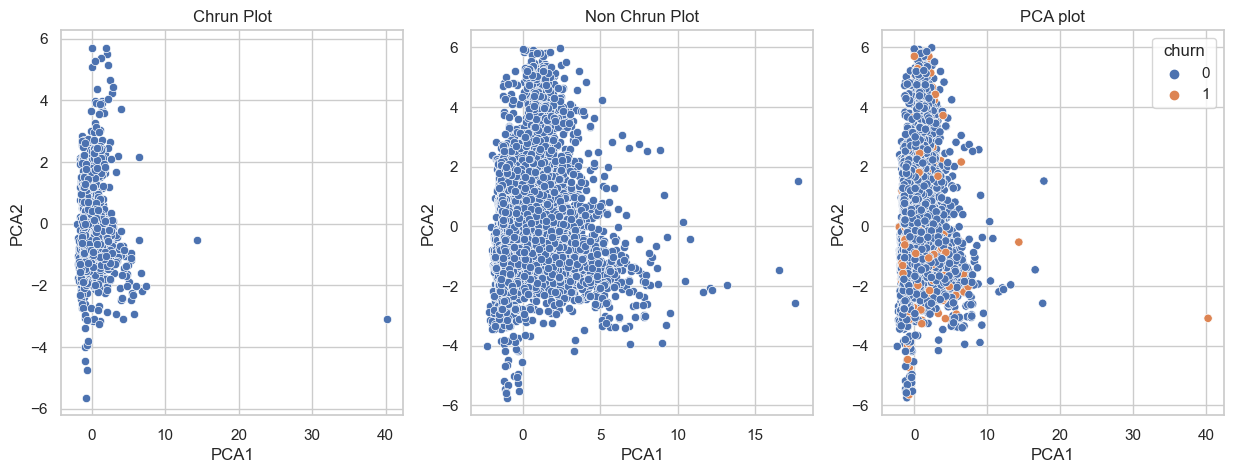

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.scatterplot(data=pca_df[pca_df['churn']==1],x='PCA1',y='PCA2')
plt.title('Chrun Plot')
plt.subplot(132)
sns.scatterplot(data=pca_df[pca_df['churn']==0],x='PCA1',y='PCA2')
plt.title('Non Chrun Plot')
plt.subplot(133)
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='churn')
plt.title('PCA plot')
plt.show()

* There some extreme points that makes the plot skewed, Let's remove those points to view more clearly

In [55]:
lb1,ub1 = iqr_range(pca_df['PCA1'])
pca_df.drop(pca_df[(pca_df['PCA1']<lb1) | (pca_df['PCA1']>ub1)].index,inplace=True)

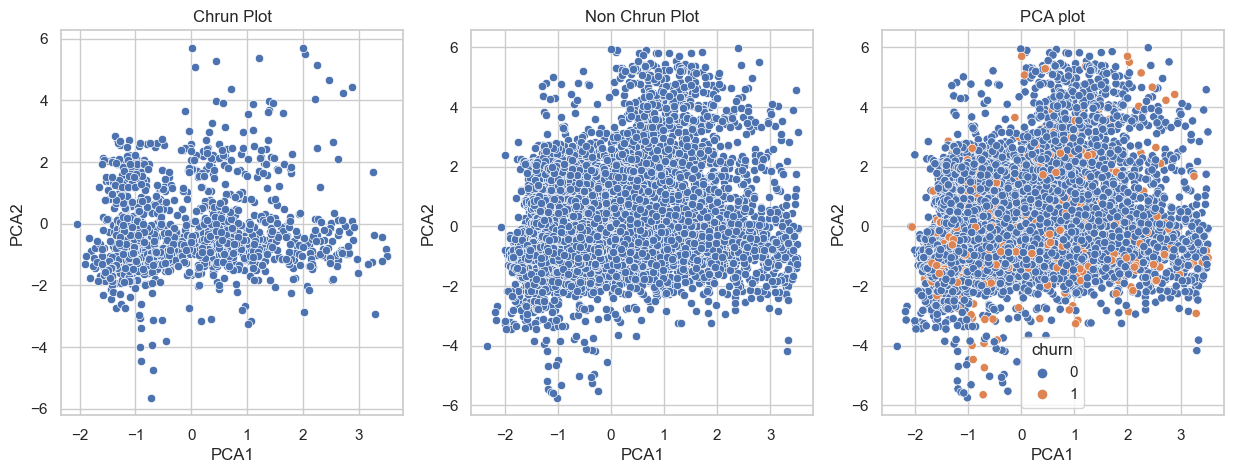

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.scatterplot(data=pca_df[pca_df['churn']==1],x='PCA1',y='PCA2')
plt.title('Chrun Plot')
plt.subplot(132)
sns.scatterplot(data=pca_df[pca_df['churn']==0],x='PCA1',y='PCA2')
plt.title('Non Chrun Plot')
plt.subplot(133)
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='churn')
plt.title('PCA plot')
plt.show()

Observing the PCA plot, the distinction between churn and non-churn customers isn't evident. KNN may not yield significant results for predictive modeling due to the lack of a clear separation boundary. However, the absence of an effective hyperplane could be mitigated with higher-dimensional separation. In such cases, Tree and Ensemble-Based Algorithms can be advantageous. Before delving into predictive modeling, addressing dataset imbalances is essential. We'll employ a decision tree to determine the appropriate sampling strategy.

## undersampling and oversampling

In [62]:
from sklearn.model_selection import train_test_split
# Balancing dataset using Synthetic Minority Over-sampling Technique with Edited Nearest Neighbour
from imblearn.combine import SMOTEENN
smt = SMOTEENN(random_state=42,sampling_strategy=0.7)
x_s,y_s = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x_s,y_s,test_size=0.27,stratify=y_s,random_state=42)#Balancing the dataset by using simple oversample follow by undersampling


In [63]:
 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversample = RandomOverSampler(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy='majority')
x_s,y_s = oversample.fit_resample(x,y)
x_s,y_s = undersample.fit_resample(x_s,y_s)
x_train,x_test,y_train,y_test = train_test_split(x_s,y_s,test_size=0.27,stratify=y_s,random_state=42)


# Modeling

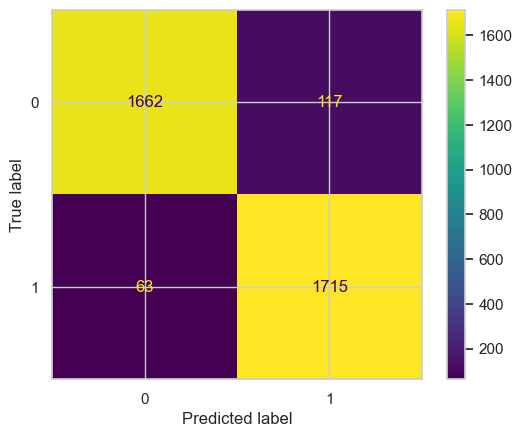

Random Forest Model:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1779
           1       0.94      0.96      0.95      1778

    accuracy                           0.95      3557
   macro avg       0.95      0.95      0.95      3557
weighted avg       0.95      0.95      0.95      3557



In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Random forest
# Initialize Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Make predictions on training and test data
y_train_pred_rf = rf_model.predict(x_train)
y_pred_rf = rf_model.predict(x_test)

# Calculate confusion matrix
cm_pred2_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_pred2_rf, display_labels=rf_model.classes_).plot()
plt.show()

# Calculate and print f1 score
f1_test_rf = f1_score(y_test, y_pred_rf)

# Print classification report
print("Random Forest Model:")
print(classification_report(y_test, y_pred_rf))

# Calculate ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)


In [65]:
print("Model's f1 score for test dataset:", f1_test_rf)
print("Model's roc auc score:", roc_auc_rf)
print("Model's accuracy :",accuracy_rf)

Model's f1 score for test dataset: 0.9501385041551247
Model's roc auc score: 0.949399822071145
Model's accuracy : 0.9493955580545403
